# 第3章　分類問題ー機械学習ライブラリscikit-learnの活用
***

## 3.1 分類アルゴリズムの選択
最適なアルゴリズムが1つに決まることはない（「ノーフリーランチ」定理）

## 3.2 scikit-learn活用のファーストステップ：パーセプトロンのトレーニング

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
#Irisデータのインポート
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1,
                                                    stratify=y)     #yのラベルの比率が、train-testに均等になるようにする

In [60]:
#y（クラスラベル）が均等に分配されていることの確認
print('Labels counts in y:', np.bincount(y))                #np.bincount(配列)→配列の各値の出現回数をカウントする
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [61]:
#標準化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [62]:
#Perceptronの実装
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)      #バージョンの問題？ n_iterが指定できない
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 1


In [63]:
#正解率の表示
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Accuracy: 0.98
Accuracy: 0.98


In [64]:
#境界線の図示（第2章のに「テストサンプルを目立たせる」コードのみ追加）
from matplotlib.colors import ListedColormap          #色を選びたいときに使うライブラリ

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    #マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])      #np.unque()は引数をセットに（重複要素をなくす）関数
                                                           #yの要素の数（今回は-1と1の2個)分の色を、colorsの先頭から取っている
    #決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    #グリットポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),     #np.arange(初項, 最終稿項, 等差)で等差数列を生成
                           np.arange(x2_min, x2_max, resolution))     #np.meshgrod(配列, 配列)→配列の要素どうしから格子列を生成
    
    #各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    #予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    
    #グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmaap=cmap)
    
    #軸の範囲の指定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):   #enumerate()で、要素のインデックス番号と要素を取り出す。
        plt.scatter(x=X[y==cl, 0],            #今回の場合は、idx, cl = (0, -1)と(1, 1)
                    y=X[y==cl, 1],
                    alpha=0.8,                #alphaは透明度
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
        
    #テストサンプルを目立たせる（点を〇で表示）
    if test_idx:                                        #関数を呼び出すときに条件（範囲）としてtest_idxを指定
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',                 #色（塗りつぶし）
                    edgecolor='black',    #色（線）
                    alpha=1.0,            #透明度
                    linewidth=1,          #線の太さ
                    marker='o',
                    s=100,                #サイズ
                    label='test set')

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'cmaap'


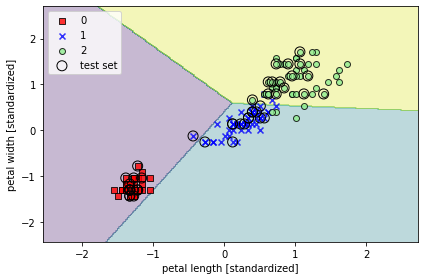

In [65]:
X_combined_std = np.vstack((X_train_std, X_test_std))      #np.vstack(A,B)→A,Bを行方向に繋げる（Aの下にBがつく）
y_combined = np.hstack((y_train, y_test))                  #np.hstack(A,B)→A,Bを列方向に繋げる（Aの右にBがつく）

plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## 3.3 ロジスティック回帰
https://qiita.com/0NE_shoT_/items/b702ab482466df6e5569  
＜メリット＞  
- 実装しやすい
- 

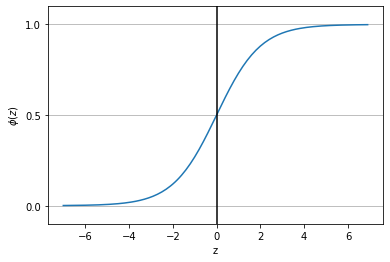

In [66]:
#シグモイド関数をプロット

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')       #z=0に垂直線を追加
plt.ylim(-0.1, 1.1)               #y軸の上限下限
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])       #目盛りの追加

ax = plt.gca()                    #Axesクラスのオブジェクトの取得
ax.yaxis.grid(True)               #y軸の目盛りに合わせて水平グリッド線を追加

plt.show()

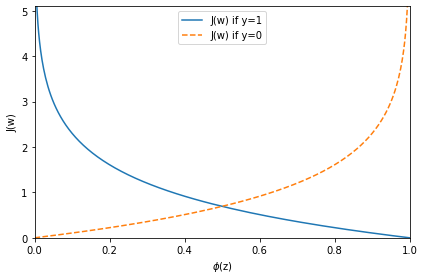

In [67]:
#y=1（正例と判断されたとき）のコストを計算する関数
def cost_1(z):
    return - np.log(sigmoid(z))

#y=0のコストを計算する関数
def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [68]:
#正則化項なしのロジスティック回帰
class LogisticRegressionGD(object):
   
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta                       #学習率
        self.n_iter = n_iter                 #何エポックか
        self.random_state = random_state     

    def fit(self, X, y):                                                  # Xがa行（a個のサンプル）b列（b個の特徴量)とする。yがa行1列
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])   #重みベクトルw（b+1行の縦ベクトル）の初期値を設定
        self.cost_ = []

        for i in range(self.n_iter):            
            net_input = self.net_input(X)                 #特徴量行列Xを受け取り、総入力の計算（a行1列になる）
            output = self.activation(net_input)           #総入力を活性化関数（シグモイド関数）にぶち込み、0～1で返ってくる（a行1列のまま）
            errors = (y - output)                         #正解ラベルy(0または1)との差＝誤差 を求める（a行1列）
            
            #ベクトルの微分？？？？？？要復習！！！！
            self.w_[1:] += self.eta * X.T.dot(errors)     #重みベクトルwの更新  X.T(b行a列)×errors（a行1列）のため、b行1列
            self.w_[0] += self.eta * errors.sum()         #重み（バイアス）の更新   併せて(b+1)行の縦ベクトルになる
            
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))  #costはあくまで計算してるだけ
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):                                   #総入力の計算
        return np.dot(X, self.w_[1:]) + self.w_[0]        

    def activation(self, z):                                  #活性化関数（シグモイド関数）
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))    

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'cmaap'


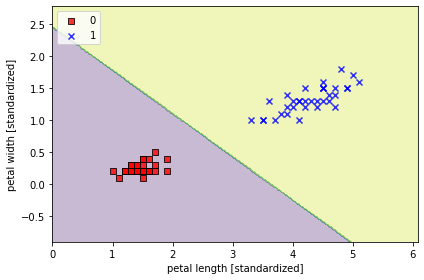

In [69]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'cmaap'


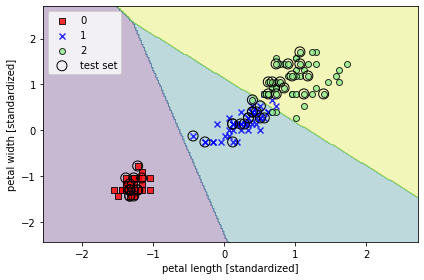

In [70]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_06.png', dpi=300)
plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver 

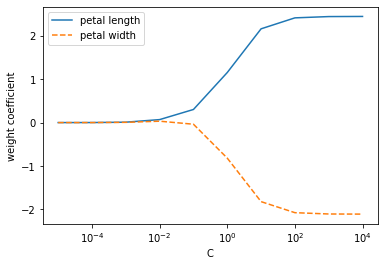

In [71]:
weights, params = [], []

#10個の逆正則化パラメータでロジスティック回帰
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], 
         linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

Cの減少→正則化の強さup→重み係数が0に近付く

## 3.4 サポートベクトルマシン  
https://logics-of-blue.com/svm-concept/  
https://kenyu-life.com/2019/08/24/iris_svm_kernel/

In [72]:
from sklearn.svm import SVC

svc = SVC(C = 1.0,
          kernel = 'rbf',
          gamma='auto_deprecated',
          random_state = 1)

svc.fit(X_train_std, y_train)
y_pred = svc.predict(X_test_std)

In [73]:
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f" % svc.score(X_test_std, y_test))
print("MIsclasified samples: %d" % (y_test != y_pred).sum())

Accuracy: 0.98
MIsclasified samples: 1


## 3.6 決定木学習

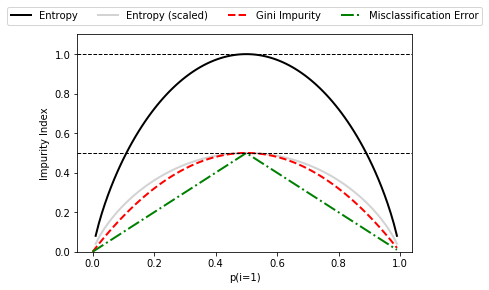

In [74]:
#各不純度の比較

import matplotlib.pyplot as plt
import numpy as np

#ジニ不純度
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))

#エントロピー
def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

#分類誤差
def error(p):
    return 1 - np.max([p, 1 - p])

#確率を表す配列（0から1まで0.1きざみ）
x = np.arange(0.0, 1.0, 0.01)

#エントロピー（2種類）
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
#分類誤差
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],                                                 #縦軸（各不純度）
                          ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'], #ラベル
                          ['-', '-', '--', '-.'],                                                      #線のスタイル
                          ['black', 'lightgray', 'red', 'green', 'cyan']):                             #マーカーの色
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'cmaap'


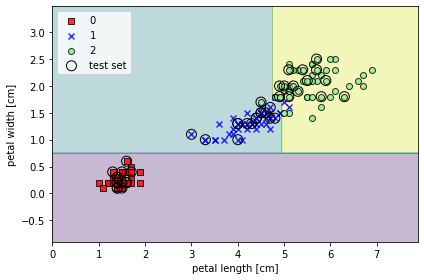

In [75]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini',    #不純度を選択
                              max_depth=4,         #木の深さを指定
                              random_state=1)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()